<a href="https://colab.research.google.com/github/yurimenzl/ml-mba-phd/blob/main/surf_tension_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import scipy as scp
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler

In [204]:
df = pd.read_csv('drive/MyDrive/surf_tension/dataset4_tf.csv', sep=",")

In [205]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
count,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000
mean,26.097942,0.932840,38.805888,39.475627,0.001031,8.550839,0.078897,0.171223,0.475779,0.180576,16.413189,0.105516,0.031655,0.013429,0.062830,150.615157
std,8.606994,0.287293,7.845542,8.719342,0.000398,4.490595,0.387822,0.604958,0.841200,1.007650,9.439345,0.337748,0.221110,0.218616,0.265349,61.934707
min,2.060000,0.486000,15.686000,17.099000,0.000231,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.025384
25%,22.080000,0.773000,33.591000,33.408000,0.000859,5.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,108.138113
50%,24.575000,0.846000,39.025000,39.481000,0.000926,8.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,142.195904
75%,28.887500,0.955750,42.837000,43.861000,0.001120,11.750000,0.000000,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,170.335346
max,280.080000,3.320000,72.163000,107.963000,0.008332,38.000000,4.000000,6.000000,9.000000,18.000000,78.000000,4.000000,2.000000,7.000000,2.000000,535.027518


In [206]:
df_work = df[[
              'F1',
              'F2',
              'F3',
              'F4',
              'F5',
              'F6',
              'F7',
              'F8',
              'F9',
              'F10',
              'F11',
              'F12',
              'F13',
              'F14',
              'F15',
              'F16',
            ]]

In [207]:
#normalize values in every column
df_norm_log = np.log(df_work)

df_norm_log = df_norm_log.replace([np.nan, -np.inf], 0)

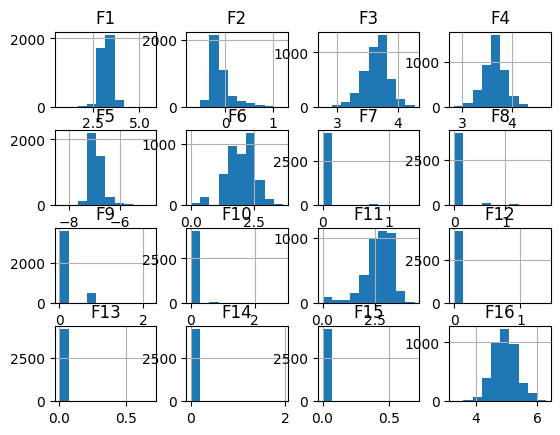

<Figure size 5000x5000 with 0 Axes>

In [208]:
# Visualização da Distribuição dos Dados conforme Histograma
pd.DataFrame(df_norm_log).hist()
plt.figure(figsize=(50,50))
plt.show()

In [210]:
#Target Feature
y = df_norm_log['F1']
# Removing target feature from dataset
df_wo_ift = df_norm_log.drop(['F1'],axis=1)

# Calculating statistics
X2 = sm.add_constant(df_wo_ift)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     F1   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1113.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:31:03   Log-Likelihood:                 2570.4
No. Observations:                4170   AIC:                            -5109.
Df Residuals:                    4154   BIC:                            -5007.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0423      0.126     16.196      0.0

# STEPWISE APPROACH

We'll dropping the highest p-value variables until all variables have p-value < 0.05

In [212]:
# enthalpy_fusion has highest p-value, so we'll remove the variable from dataset and rerun the model

# Dropped Salinity
df_wo_fields = df_wo_ift.drop( ['F15'], 1)
# Calculating statistics
X2 = sm.add_constant(df_wo_fields)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     F1   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1192.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:31:18   Log-Likelihood:                 2568.8
No. Observations:                4170   AIC:                            -5108.
Df Residuals:                    4155   BIC:                            -5012.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9989      0.124     16.148      0.0

<Axes: >

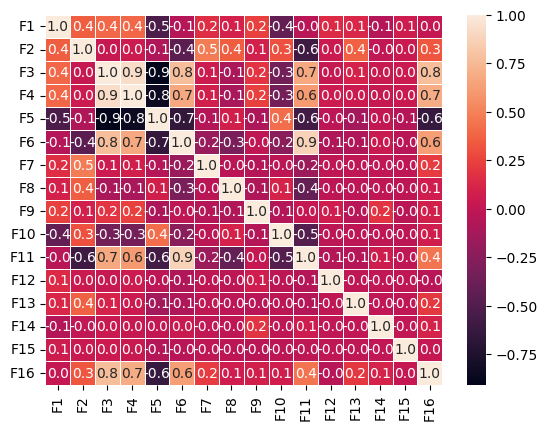

In [213]:
correlation = df_norm_log.corr()

# plot da matriz de correlação

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [214]:
df_treated = df_norm_log.drop( ['F6', 'F3', 'F4', 'F5'], 1)

In [216]:
#Target Feature
y = df_treated['F1']
# Removing target feature from dataset
df_wo_ift = df_treated.drop(['F1'],axis=1)

# Calculating statistics
X2 = sm.add_constant(df_wo_ift)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     F1   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     472.6
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:31:58   Log-Likelihood:                 897.24
No. Observations:                4170   AIC:                            -1770.
Df Residuals:                    4158   BIC:                            -1694.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0092      0.072     69.164      0.0

<Axes: >

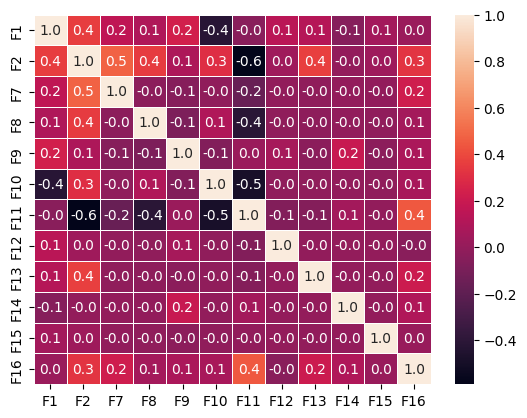

In [217]:
correlation = df_treated.corr()

# plot da matriz de correlação

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [139]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import xgboost as xgb

# Splitting data into training/testing
from sklearn.model_selection import train_test_split,learning_curve,cross_val_score,cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, classification_report

In [154]:
df_work_with_atoms_and_ions = df[[
              'surface_tension',
              'density_liquid',
              'C',
              'Br',
              'Cl',
              'O',
              'F',
              'H',
              'N',
              'I',
              'Si',
              'S',
              'molecular_weight'
            ]]

In [219]:
# Takes in a dataframe, finds the most correlated variables with the
# grade and returns training and testing datasets
def format_data(df):
    # Targets are final grade of student
    labels = df['F1']

    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df)

    # Find correlations with the Grade
    most_correlated = df.corr().abs()['F1'].sort_values(ascending=False)

    # Maintain the top 5 most correlation features with Grade
    most_correlated = most_correlated[:17]

    df = df.loc[:, most_correlated.index]

    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels,
                                                        test_size = 0.25,
                                                        random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = format_data(df)
X_train.head()

,F1,F5,F2,F9,F4,F11,F3,F10,F6,F7,F12,F13,F8,F14,F15,F16
1953,26.60,0.000938,0.8834,2.0,42.904,16.0,39.546,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,132.201046
2499,24.42,0.000921,0.7500,0.0,38.165,18.0,38.581,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,138.250338
2534,22.35,0.000955,0.7865,0.0,32.436,20.0,38.915,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,140.266220
3778,21.97,0.000848,0.7708,0.0,46.113,28.0,45.724,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,196.372708
3007,20.56,0.000924,0.7386,0.0,37.596,24.0,38.576,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,156.308724


------------------
RidgeCV
------Train-------
Score: 0.6266    |
-------Test-------
Score: 0.7321    |
------------------


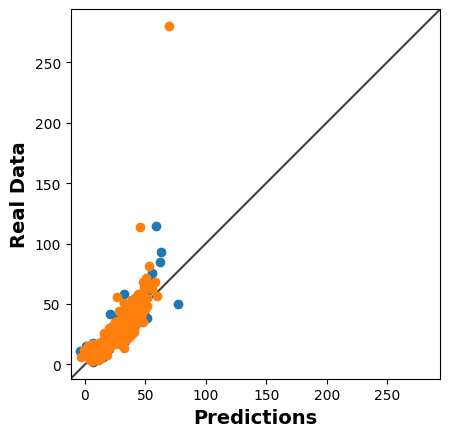

Random Forest
------Train-------
Score: 0.9351    |
-------Test-------
Score: 0.8063    |
------------------


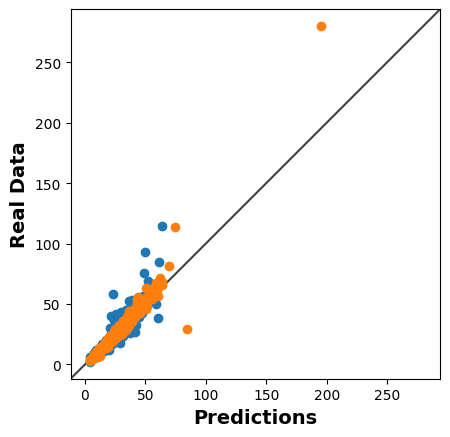

Extra Trees
------Train-------
Score: 0.9999    |
-------Test-------
Score: 0.8300    |
------------------


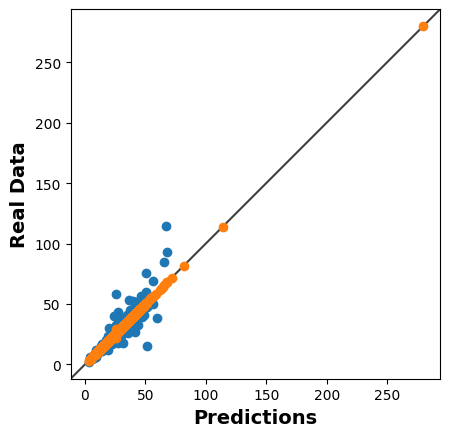

XGBoost
------Train-------
Score: 0.9960    |
-------Test-------
Score: 0.8290    |
------------------


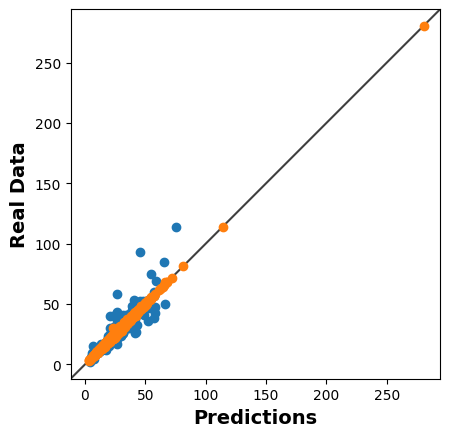

Gradient Boosted
------Train-------
Score: 0.7242    |
-------Test-------
Score: 0.5566    |
------------------


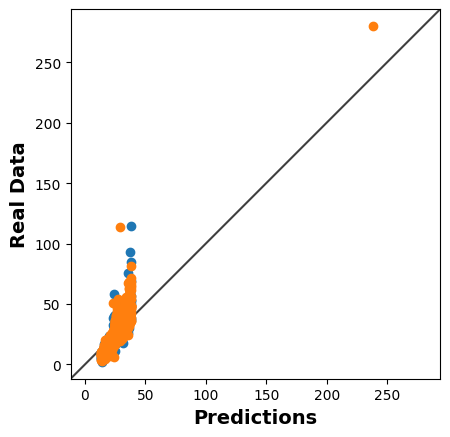

In [222]:
def model_predict(X_data,target,salinity,model):
    print("Salinity: {:.4f} | Target: {:.4f}".format(salinity,target),model.predict(X_data),(1-(model.predict(X_data)/target))*100)

# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['RidgeCV',
                      'Random Forest', 'Extra Trees',
                       'XGBoost', 'Gradient Boosted',
                       'Baseline'
                       ]
    pred_plot = []
    real_plot = y_test

    # Instantiate the models
    model2 = RidgeCV()
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    model6 = GradientBoostingRegressor(n_estimators=20)
    print('------------------')
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    X_train = X_train.drop(['F1'],axis=1)
    X_test = X_test.drop(['F1'],axis=1)
    # Train and predict with each model
    for i, model in enumerate([model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(model_name_list[i])
        print('------Train-------')
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        score = model.score(X_train,y_train)
        print("Score: {:.4f}    |".format(score))
        print('-------Test-------')

        # Insert results into the dataframe
        score = model.score(X_test,y_test)
        print("Score: {:.4f}    |".format(score))
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
        print('------------------')

        fig, ax = plt.subplots()

        plt.scatter(predictions, y_test)
        plt.scatter(model.predict(X_train), y_train)
        plt.xlabel("Predictions",fontsize=14,fontweight='bold')
        plt.ylabel("Real Data",fontsize=14,fontweight='bold')

        #add linear regression line to scatterplot
        lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]

        # now plot both limits against eachother
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        ax.set_aspect('equal')
        ax.set_xlim(lims)
        ax.set_ylim(lims)

        plt.show()

    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    baseline_mae_s = model.score(X_train,y_train)

    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]



    return results

results = evaluate(X_train, X_test, y_train, y_test)



In [223]:
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title="model", callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers

    optimizer = a sklearn or a skopt optimizer
    X = the training set
    y = our target
    title = a string label for the experiment
    """
    start = time()

    if callbacks is not None:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)

    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_

    print((title + " took %.2f seconds,  best CV score: %.3f "
           + u"\u00B1"+" %.3f") % (time() - start,
                                   best_score,
                                   best_score_std))
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

In [224]:
# Importing core libraries
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
from functools import partial

# Suppressing warnings because of skopt verbosity
import warnings
warnings.filterwarnings("ignore")

# Classifier/Regressor
from xgboost import DMatrix

# Model selection
from sklearn.model_selection import KFold, StratifiedKFold

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer

# Data processing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# instanciando o algoritmo de classificação XGBoost
reg = xgb.XGBRegressor(random_state=0, booster='gbtree', objective='reg:squarederror')

# Setting the scoring function
scoring = make_scorer(partial(mean_squared_error, squared=False),
                      greater_is_better=False)

# Setting the validation strategy
skf = KFold(n_splits=7,
                      shuffle=True,
                      random_state=0)

cv_strategy = list(skf.split(X_train, y_train))

# Setting the search space
search_spaces = {'learning_rate': Real(0.01, 1.0, 'uniform'),
                 'max_depth': Integer(2, 12),
                 'subsample': Real(0.1, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
                 'reg_lambda': Real(1e-9, 100., 'uniform'), # L2 regularization
                 'reg_alpha': Real(1e-9, 100., 'uniform'), # L1 regularization
                 'n_estimators': Integer(50, 5000)
   }
# Wrapping everything up into the Bayesian optimizer
opt = BayesSearchCV(estimator=reg,
                    search_spaces=search_spaces,
                    scoring=scoring,
                    cv=cv_strategy,
                    n_iter=120,                                       # max number of trials
                    n_points=1,                                       # number of hyperparameter sets evaluated at the same time
                    n_jobs=1,                                         # number of jobs
                    iid=False,                                        # if not iid it optimizes on the cv score
                    return_train_score=False,
                    refit=False,
                    optimizer_kwargs={'base_estimator': 'GP'},        # optmizer parameters: we use Gaussian Process (GP)
                    random_state=0)                                   # random state for replicability
# Running the optimizer
overdone_control = DeltaYStopper(delta=0.0001)                    # We stop if the gain of the optimization becomes too small
time_limit_control = DeadlineStopper(total_time=60*60*4)          # We impose a time limit (7 hours)

best_params = report_perf(opt, X_train, y_train,'XGBoost_regression',
                          callbacks=[overdone_control, time_limit_control])

XGBoost_regression took 2070.53 seconds,  candidates checked: 120, best CV score: -1.927 ± 2.593
Best parameters:
OrderedDict([('colsample_bytree', 1.0),
             ('learning_rate', 0.8148908428476893),
             ('max_depth', 5),
             ('n_estimators', 5000),
             ('reg_alpha', 1e-09),
             ('reg_lambda', 1e-09),
             ('subsample', 1.0)])



In [225]:
# Transferring the best parameters to our basic regressor
reg = xgb.XGBRegressor(random_state=0, booster='gbtree', objective='reg:squarederror', **best_params)

In [226]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [227]:
# Cross-validation prediction
folds = 10
skf = KFold(n_splits=folds,
                      shuffle=True,
                      random_state=0)

predictions = np.zeros(len(X_test))
rmse = list()

for k, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    reg.fit(X_train[train_idx], y_train[train_idx])
    val_preds = reg.predict(X_train[val_idx])
    val_rmse = mean_squared_error(y_true=y_train[val_idx], y_pred=val_preds, squared=False)
    print(f"Fold {k} RMSE: {val_rmse:0.5f}")
    rmse.append(val_rmse)
    predictions += reg.predict(X_test).ravel()

predictions /= folds
print(f"repeated CV RMSE: {np.mean(rmse):0.5f} (std={np.std(rmse):0.5f})")

Fold 0 RMSE: 3.01774
Fold 1 RMSE: 0.29272
Fold 2 RMSE: 2.66287
Fold 3 RMSE: 0.24036
Fold 4 RMSE: 9.65674
Fold 5 RMSE: 0.34886
Fold 6 RMSE: 0.33610
Fold 7 RMSE: 0.22056
Fold 8 RMSE: 3.14388
Fold 9 RMSE: 0.30653
repeated CV RMSE: 2.02264 (std=2.80971)
